<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li><b>2. Use the "titanic" dataset from the seaborn datasets
(sns.load_dataset('titanic')).</b> Find out the features of a typical person
that survived or did not survive the sinking of Titanic.</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/titanic.png"/>

C:\Users\marc\AppData\Local\Temp\ipykernel_24152\935668211.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<Axes: >

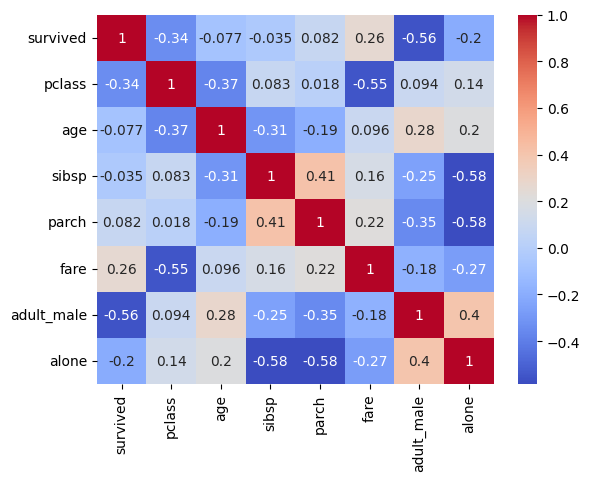

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_titanic = sns.load_dataset('titanic')

corr_titanic = df_titanic.corr(numeric_only=True)
sns.heatmap(corr_titanic, cmap='coolwarm', annot=True)

<p style="color: lightgreen;">From the heatmap, we see that the only positive correllations with survival are 'fare' (price for ticket) and 'parch' (number of parents/children aboard). You were more likely to survive if you paid for an expensive ticket or if you had your family aboard.</p><p style="color: lightgreen;"> The highest negative correllation is for adult males, meaning that they were the most likely to die. There is also a high negative correllation with 'pclass' and 'alone'. People in the lower classes were more likely to die because the lower classes have a higher value (1 = 1st class, 2 = 2nd class, 3 = 3rd class). People who were travelling alone were also more likely to die.</p>


<li><b>3. Use the "taxis" dataset from the seaborn datasets
(sns.load_dataset('taxis')).</b> Find out any correlations or interesting
behaviors based on any columns in the data (color, payment,
pickup_borough, dropoff_borough etc.)
<br /><br />

<b>Notes and ideas to try out:</b><br />
Consider removing the pickup_zone and dropoff_zone, since there are
way too many alternatives. Borough is the larger area in question, which
can be helpful while grouping data (hue!)<br /><br />
How about pickup and dropoff times, should they be modified? From
taxi point of view, is the weekday and time of day (morning, day,
evening, night) more interesting than the actual dates?
<br /><br />
These are just ideas, you're free to come up with your own ideas
regarding the data!</li>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/taxis.png"/>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_taxis = sns.load_dataset('taxis')
df_taxis.to_csv('taxis_data.csv', index=False)
# remove pickup and dropoff zones
df_taxis = df_taxis.drop(columns=['pickup_zone', 'dropoff_zone'])
# remove trips with distance 0
df_taxis = df_taxis[df_taxis['distance'] > 0]

df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan


In [3]:
# get weekday from datetime
def get_weekday(dt):
    return dt.weekday()

# convert datetime to time of day
def time_of_day(dt):
    if dt.hour < 6:
        return 'night'
    elif dt.hour < 12:
        return 'morning'
    elif dt.hour < 18:
        return 'afternoon'
    else:
        return 'evening'
    
# apply get_weekday to pickup 
df_taxis['weekday'] = df_taxis['pickup'].apply(get_weekday)

# apply time_of_day to pickup and remove pickup and dropoff times
df_taxis['time_of_day'] = df_taxis['pickup'].apply(time_of_day)
df_taxis = df_taxis.drop(columns=['pickup', 'dropoff'])
df_taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough,weekday,time_of_day
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan,5,evening
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan,0,afternoon
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan,2,afternoon
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan,6,night
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan,5,afternoon


C:\Users\marc\AppData\Local\Temp\ipykernel_24152\209973901.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pickup_borough', y='distance', data=df_taxis, palette='coolwarm')


(0.0, 25.0)

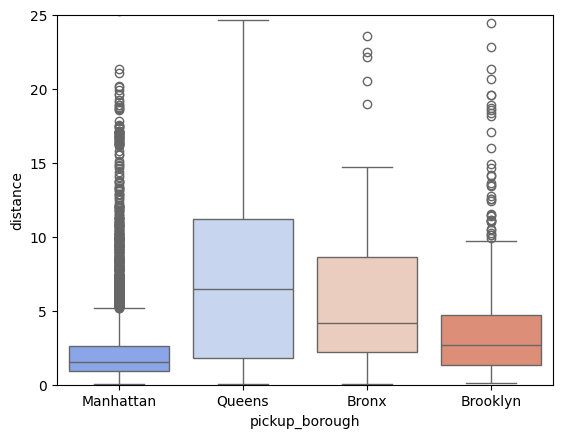

In [4]:
sns.boxplot(x='pickup_borough', y='distance', data=df_taxis, palette='coolwarm')
plt.ylim(0, 25)

<p style="color: lightgreen;">The longest taxirides are from Queens.</p>

<Axes: xlabel='weekday', ylabel='count'>

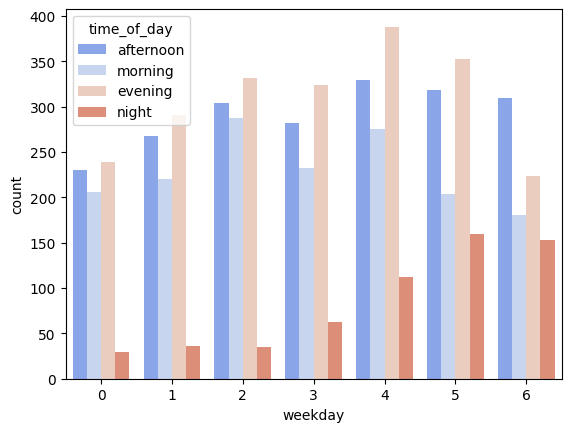

In [5]:
sns.countplot(x='weekday', data=df_taxis, hue='time_of_day', palette='coolwarm')

<p style="color: lightgreen;">Friday evenings are the busiest.</p>

<Axes: xlabel='color', ylabel='tip'>

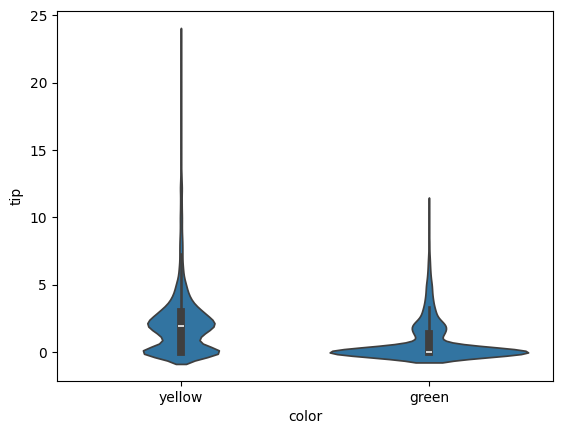

In [6]:
sns.violinplot(x='color', y='tip', data=df_taxis)

<p style="color: lightgreen;">Yellow taxi drivers get bigger tips.</p>

(40.0, 60.0)

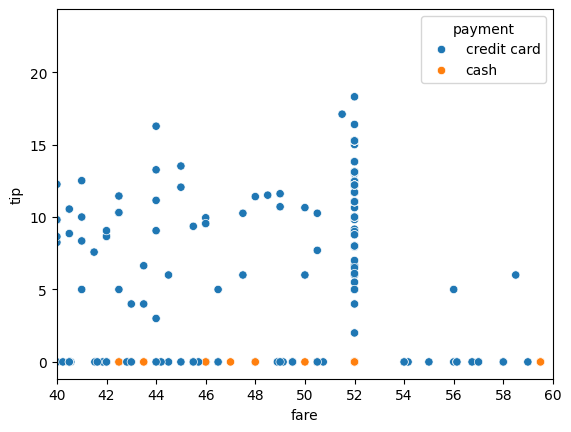

In [7]:
sns.scatterplot(x='fare', y='tip', data=df_taxis, hue='payment')
plt.xticks(range(0, int(df_taxis['fare'].max()) + 1, 2))

plt.xlim(40, 60)

<p style="color: lightgreen;">Tips in cash aren't included in the dataset. It also looks like $52 is a fixed fare: It used to be the price for a ride from the JFK airport to Manhattan.</p>

<a href="https://www.reddit.com/r/AskNYC/comments/1072hqb/jfk_to_manhattan_yellow_taxi_flat_rate_up_to_70/">reddit post</a>